# EQUITY BARRIER OPTIONS - VALUATION ANALYSIS

Valuation and Risk of Equity Barrier Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.33 - This build:  11 Nov 2023 at 07:47 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



## Types of Barrier Option

In [3]:
for barrierType in EquityBarrierTypes:
    print(barrierType)

EquityBarrierTypes.DOWN_AND_OUT_CALL
EquityBarrierTypes.DOWN_AND_IN_CALL
EquityBarrierTypes.UP_AND_OUT_CALL
EquityBarrierTypes.UP_AND_IN_CALL
EquityBarrierTypes.UP_AND_OUT_PUT
EquityBarrierTypes.UP_AND_IN_PUT
EquityBarrierTypes.DOWN_AND_OUT_PUT
EquityBarrierTypes.DOWN_AND_IN_PUT


## Market Environment

In [4]:
interest_rate = 0.05

In [5]:
value_date = Date(1, 9, 2020)

In [6]:
discount_curve = DiscountCurveFlat(value_date, interest_rate)

In [7]:
dividend_yield = 0.01

In [8]:
dividend_curve = DiscountCurveFlat(value_date, dividend_yield)

In [9]:
volatility = 0.20

In [10]:
model = BlackScholes(volatility)

## Simple Example: Up and Out Call

This is an option whose that knocks out if the barrier is crossed from below. We're at maturity !

In [11]:
expiry_date = Date(1, 9, 2020)
num_observations = 1

In [12]:
barrierType = EquityBarrierTypes.UP_AND_OUT_CALL

In [13]:
discount_curve = DiscountCurveFlat(value_date, interest_rate)

In [14]:
strike_price = 1.3
barrier_price = 1.45
stock_prices = np.linspace(1.2, 1.6, 100)

In [15]:
barrierOpt = EquityBarrierOption(expiry_date, strike_price, barrierType, barrier_price, num_observations)

In [16]:
values = barrierOpt.value(value_date, stock_prices, discount_curve, dividend_curve, model)

c:\Users\Dominic\anaconda3\lib\site-packages\numba\np\ufunc\dufunc.py:190: RuntimeWarning: divide by zero encountered in value_bs
  return super().__call__(*args, **kws)


In [17]:
stock_prices

array([1.2       , 1.2040404 , 1.20808081, 1.21212121, 1.21616162,
       1.22020202, 1.22424242, 1.22828283, 1.23232323, 1.23636364,
       1.24040404, 1.24444444, 1.24848485, 1.25252525, 1.25656566,
       1.26060606, 1.26464646, 1.26868687, 1.27272727, 1.27676768,
       1.28080808, 1.28484848, 1.28888889, 1.29292929, 1.2969697 ,
       1.3010101 , 1.30505051, 1.30909091, 1.31313131, 1.31717172,
       1.32121212, 1.32525253, 1.32929293, 1.33333333, 1.33737374,
       1.34141414, 1.34545455, 1.34949495, 1.35353535, 1.35757576,
       1.36161616, 1.36565657, 1.36969697, 1.37373737, 1.37777778,
       1.38181818, 1.38585859, 1.38989899, 1.39393939, 1.3979798 ,
       1.4020202 , 1.40606061, 1.41010101, 1.41414141, 1.41818182,
       1.42222222, 1.42626263, 1.43030303, 1.43434343, 1.43838384,
       1.44242424, 1.44646465, 1.45050505, 1.45454545, 1.45858586,
       1.46262626, 1.46666667, 1.47070707, 1.47474747, 1.47878788,
       1.48282828, 1.48686869, 1.49090909, 1.49494949, 1.49898

Text(0, 0.5, 'Value')

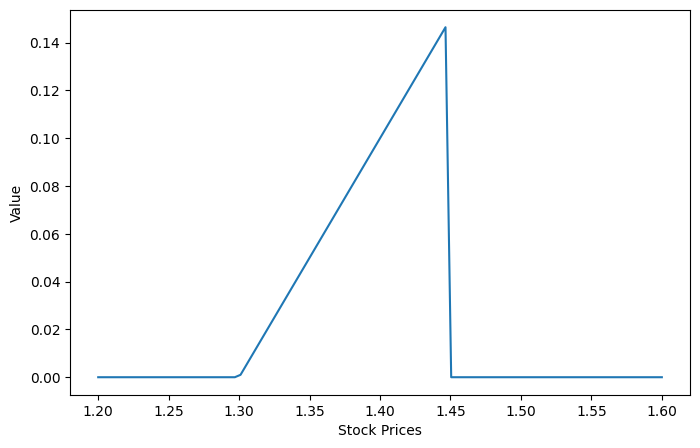

In [18]:
plt.figure(figsize=(8,5))
plt.plot(stock_prices, values)  
plt.xlabel("Stock Prices")
plt.ylabel("Value")

In [19]:
deltas = barrierOpt.delta(value_date, stock_prices, discount_curve, dividend_curve, model)

Text(0, 0.5, 'Delta')

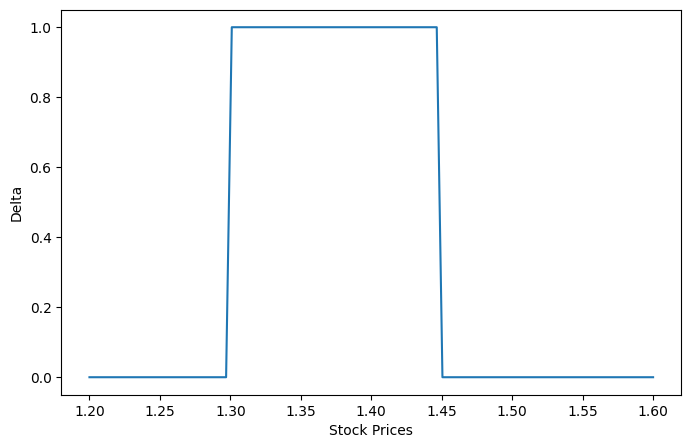

In [20]:
plt.figure(figsize=(8,5))
plt.plot(stock_prices, deltas)  
plt.xlabel("Stock Prices")
plt.ylabel("Delta")

## Test: IN + OUT barrier = VANILLA option

In [21]:
value_date = Date(1, 1, 2020)
expiry_date = Date(1, 1, 2021)
num_observations = (expiry_date - value_date)

In [22]:
discount_curve = DiscountCurveFlat(value_date, interest_rate)
dividend_curve = DiscountCurveFlat(value_date, dividend_yield)

In [23]:
stock_price = 105.0
strike_price = 100.0
barrier_price = 90.0

We examine all of the combinations of IN and OUT

In [24]:
barrierIn = EquityBarrierTypes.DOWN_AND_IN_CALL
barrierOut = EquityBarrierTypes.DOWN_AND_OUT_CALL
barrierInOpt = EquityBarrierOption(expiry_date, strike_price, barrierIn, barrier_price, num_observations)
barrierOutOpt = EquityBarrierOption(expiry_date, strike_price, barrierOut, barrier_price, num_observations)
call_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_CALL)
v_in = barrierInOpt.value(value_date, stock_price, discount_curve, dividend_curve, model)
v_out = barrierOutOpt.value(value_date, stock_price, discount_curve, dividend_curve, model)
v_call = call_option.value(value_date, stock_price, discount_curve, dividend_curve, model)
print(v_in, v_out, v_call, v_in + v_out)

0.883298824162026 12.237089225373868 13.120388049535894 13.120388049535894


In [25]:
barrierIn = EquityBarrierTypes.UP_AND_IN_CALL
barrierOut = EquityBarrierTypes.UP_AND_OUT_CALL
barrierInOpt = EquityBarrierOption(expiry_date, strike_price, barrierIn, barrier_price, num_observations)
barrierOutOpt = EquityBarrierOption(expiry_date, strike_price, barrierOut, barrier_price, num_observations)
call_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_CALL)
v_in = barrierInOpt.value(value_date, stock_price, discount_curve, dividend_curve, model)
v_out = barrierOutOpt.value(value_date, stock_price, discount_curve, dividend_curve, model)
v_call = call_option.value(value_date, stock_price, discount_curve, dividend_curve, model)
print(v_in, v_out, v_call, v_in + v_out)

13.120388049535894 0.0 13.120388049535894 13.120388049535894


In [26]:
barrierIn = EquityBarrierTypes.DOWN_AND_IN_PUT
barrierOut = EquityBarrierTypes.DOWN_AND_OUT_PUT
barrierInOpt = EquityBarrierOption(expiry_date, strike_price, barrierIn, barrier_price, num_observations)
barrierOutOpt = EquityBarrierOption(expiry_date, strike_price, barrierOut, barrier_price, num_observations)
put_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_PUT)
v_in = barrierInOpt.value(value_date, stock_price, discount_curve, dividend_curve, model)
v_out = barrierOutOpt.value(value_date, stock_price, discount_curve, dividend_curve, model)
v_put = put_option.value(value_date, stock_price, discount_curve, dividend_curve, model)
print(v_in, v_out, v_put, v_in + v_out)

4.06343345147219 0.22466450447246503 4.288097955944653 4.2880979559446555


In [27]:
barrierIn = EquityBarrierTypes.UP_AND_IN_PUT
barrierOut = EquityBarrierTypes.UP_AND_OUT_PUT
barrierInOpt = EquityBarrierOption(expiry_date, strike_price, barrierIn, barrier_price, num_observations)
barrierOutOpt = EquityBarrierOption(expiry_date, strike_price, barrierOut, barrier_price, num_observations)
put_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_PUT)
v_in = barrierInOpt.value(value_date, stock_price, discount_curve, dividend_curve, model)
v_out = barrierOutOpt.value(value_date, stock_price, discount_curve, dividend_curve, model)
v_put = put_option.value(value_date, stock_price, discount_curve, dividend_curve, model)
print(v_in, v_out, v_put, v_in + v_out)

4.288097955944655 0.0 4.288097955944653 4.288097955944655


# Examining Barrier Values and Risk

In [28]:
barrier_price = 120.0
strike_price = 90.0

In [29]:
value_date = Date(1, 6, 2020)
expiry_date = Date(1, 12, 2020)

In [30]:
discount_curve = DiscountCurveFlat(value_date, interest_rate)
dividend_curve = DiscountCurveFlat(value_date, dividend_yield)

In [31]:
stock_prices = np.linspace(50,150,100)

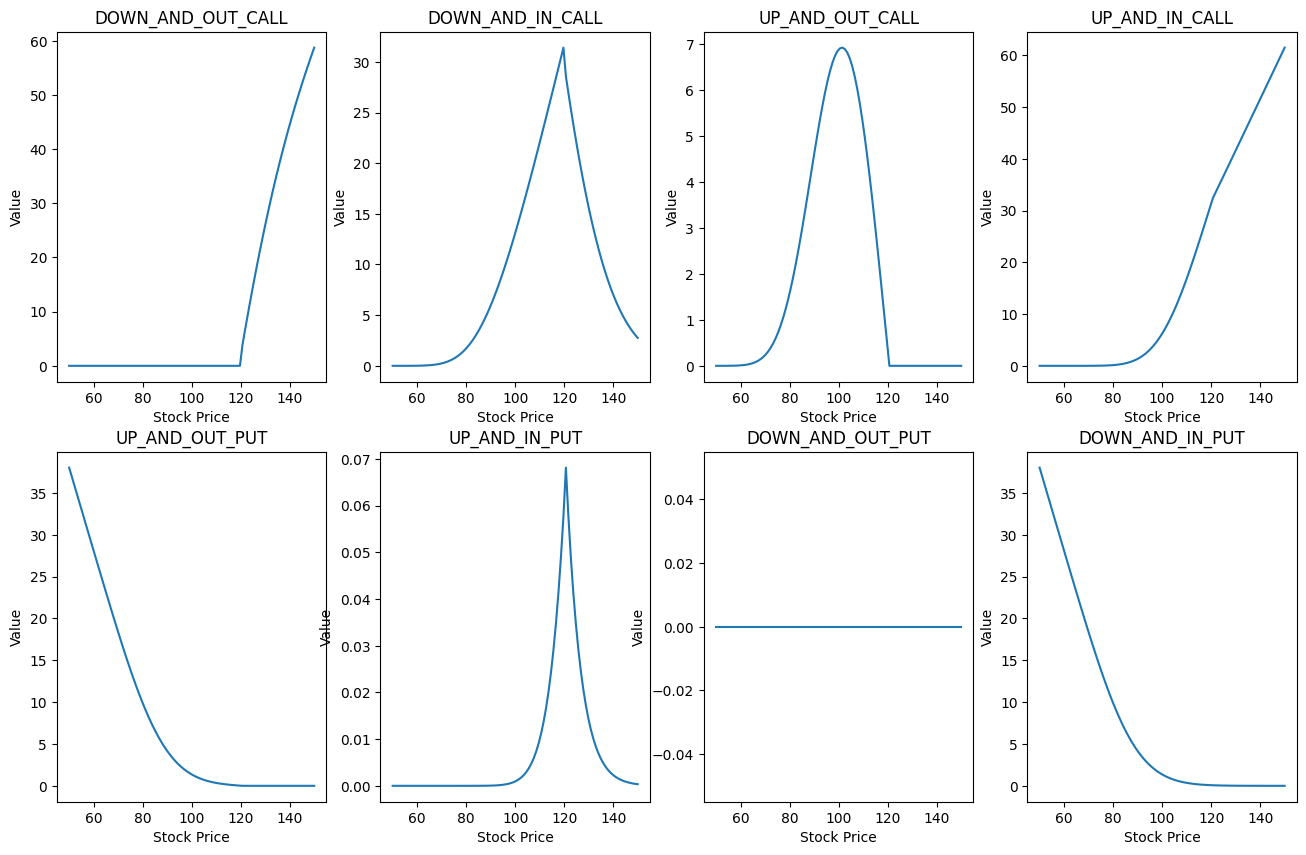

In [32]:
f1 = plt.figure(figsize=(16,10))
r = 1
for barrierType in EquityBarrierTypes:
    barrier_option = EquityBarrierOption(expiry_date, strike_price, barrierType, barrier_price, num_observations)
    v = barrier_option.value(value_date, stock_prices, discount_curve, dividend_curve, model)
    plt.subplot(2, 4, r)  
    r = r + 1

    plt.plot(stock_prices, v)  
    plt.title(barrierType.name)
    plt.xlabel("Stock Price")
    plt.ylabel("Value")

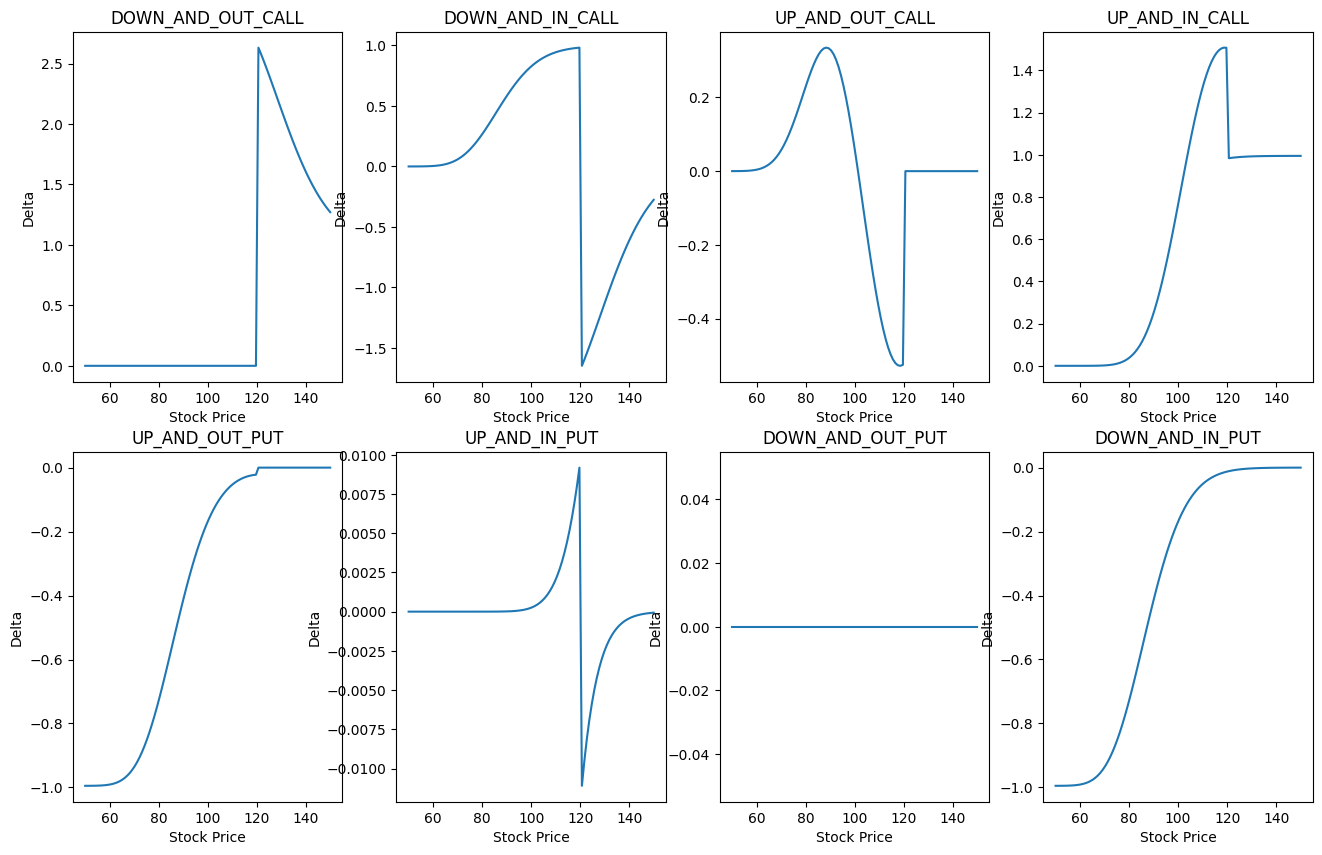

In [33]:
f1 = plt.figure(figsize=(16,10))
r = 1
for barrierType in EquityBarrierTypes:
    barrier_option = EquityBarrierOption(expiry_date, strike_price, barrierType, barrier_price, num_observations)
    v = barrier_option.delta(value_date, stock_prices, discount_curve, dividend_curve, model)
    plt.subplot(2, 4, r)  
    r = r +1
    plt.plot(stock_prices, v)  
    plt.title(barrierType.name)
    plt.xlabel("Stock Price")
    plt.ylabel("Delta")

Copyright (c) 2020 Dominic O'Kane